## Observing the Dataset

In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
file_path = "US_Accidents_March23.csv"
df = pd.read_csv(file_path)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df.shape

(7728394, 46)

In [5]:
df.isna().sum() #Seeing if there are NaN values

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
df.isna().any().sum() # the total number of columns with missing values

22

There appear to be many columns in the dataset with NaN values. We will have to figure out strategies to deal with them. For some columns such as 'End Lat' and 'End_Long' that have over 3 million NaN values, it may be best to simply drop them. Other numerical features such as 'Temperature', 'Humidity', and 'Pressure' can be imputed with the mean or the median of the data (depending on the presence of outliers in the data). For the categorical variables, we can fill in the missing values with 'Unknown'.

## Preprocessing and Data Cleaning

### Handling Missing Values

In [7]:
data_types = df.dtypes.reset_index()
data_types.columns = ['Count','Column_Type']
data_types.groupby('Column_Type').agg('count').reset_index() # Number of columns disaggregated by data type

,Column_Type,Count
0,bool,13
1,int64,1
2,float64,12
3,object,20


In [8]:
df_nan = df.isna().sum().reset_index()


We will aim to drop columns with over 250,000 NaN values. This will mostly include features with missing values in the millions however.

In [9]:
df_nan.columns = ['Feature','Count']
drop = df_nan.loc[df_nan['Count']>250000]
droplist = drop.Feature.tolist()
droplist

['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Precipitation(in)']

In [10]:
df = df.drop(columns = droplist, errors = 'ignore')

In [11]:
df_types = df.dtypes.reset_index()
df_types.columns = ['Name','Type']

In [12]:
df = df.drop(columns=['Description','Street','City','Zipcode','Airport_Code','Weather_Timestamp'
                      ,'Country','County','ID','Source'], errors= 'ignore') # Drop columns unneccessary for the analysis

### Handling Numeric Variables

In [13]:
numeric_df = df_types[(df_types.Type == 'float64') | (df_types.Type == 'int64')]
numeric_list = numeric_df.Name.tolist() # List of numeric features to create a correlation heatmap

In [14]:
numeric_df.Name = numeric_df.Name.drop(2)
numeric_df
numeric_df = numeric_df.dropna() # Drop Severity as it is not continuous
numeric_list = numeric_df.Name.tolist()

/var/folders/bz/dmkkflj524g_9c1psjd1y3rw0000gn/T/ipykernel_45988/2030435667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.Name = numeric_df.Name.drop(2)


,Name,Type
2,NaN,int64
5,Start_Lat,float64
6,Start_Lng,float64
7,Distance(mi),float64
18,Temperature(F),float64
19,Humidity(%),float64
20,Pressure(in),float64
21,Visibility(mi),float64


<Axes: >

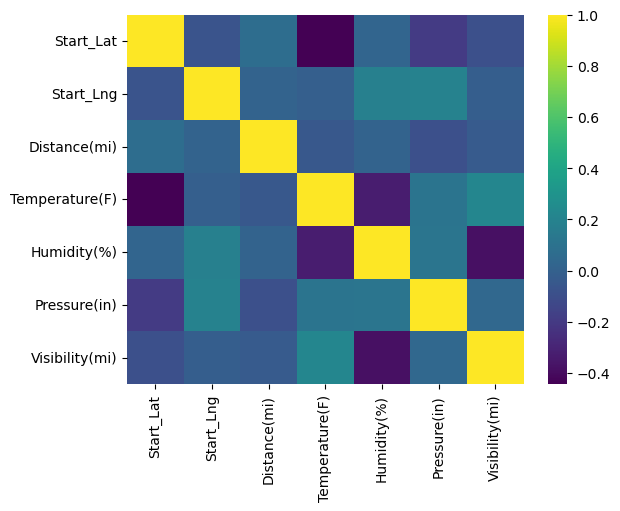

In [15]:
import seaborn as sns
corr = df[numeric_list].corr()
sns.heatmap(corr,cmap='viridis')

It seems like the continuous numeric features are not very correlated to each other. It seems like 0.3 is the largest correlation coefficient and is seen between Start_Lng and Pressure and Humidity. To handle missing values, we will impute with the median as it is less sensitive to outliers. Outliers are extremely common, especially in weather-related data.

In [16]:
df[numeric_list] = df[numeric_list].fillna(df[numeric_list].median()) # Impute the missing values with the median

### Handling Categorical Variables

In [17]:
# Find all categorical variables with NaN values
df_types = df.dtypes.reset_index()
df_types.columns = ['Name','DType']
df_nan = df.isna().sum().reset_index()
df_nan.columns = ['Name','Count']
dummy_df = pd.merge(df_nan,df_types, on = 'Name')
dummy_df = dummy_df[dummy_df.Count>0]
dummy_df

,Name,Count,DType
7,Timezone,7808,object
12,Wind_Direction,175206,object
13,Weather_Condition,173459,object
27,Sunrise_Sunset,23246,object
28,Civil_Twilight,23246,object
29,Nautical_Twilight,23246,object
30,Astronomical_Twilight,23246,object


In [18]:
# Looking at all the weather conditions

df['Weather_Condition'].unique()


array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [19]:
# Define weather categories based on provided weather conditions (via Gen AI)
weather_categories = {
    'Clear': ['Clear', 'Fair', 'Mostly Clear'],
    'Cloudy': ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Cloudy'],
    'Rain': ['Light Rain', 'Rain', 'Heavy Rain', 'Rain Shower', 'Drizzle', 'Heavy Drizzle',
             'Light Drizzle', 'Light Rain Showers', 'Rain Showers', 'Heavy Rain Showers'],
    'Thunderstorm': ['Thunderstorms and Rain', 'Thunderstorm', 'T-Storm', 'Thunder',
                     'Heavy Thunderstorms and Rain', 'Thunder in the Vicinity',
                     'Thunder / Windy', 'Thunder and Hail', 'Thunder and Hail / Windy',
                     'Thunder / Wintry Mix'],
    'Snow': ['Light Snow', 'Snow', 'Heavy Snow', 'Light Snow Showers', 'Snow Showers',
             'Snow / Windy', 'Blowing Snow', 'Blowing Snow Nearby', 'Heavy Blowing Snow',
             'Snow and Thunder', 'Snow and Sleet', 'Light Snow and Sleet', 'Snow and Sleet / Windy',
             'Heavy Snow with Thunder', 'Heavy Snow / Windy'],
    'Fog/Haze': ['Haze', 'Fog', 'Shallow Fog', 'Mist', 'Patches of Fog', 'Light Fog',
                 'Fog / Windy', 'Dense Fog', 'Partial Fog', 'Patches of Fog / Windy',
                 'Shallow Fog / Windy'],
    'Windy/Dusty': ['Blowing Sand', 'Blowing Dust', 'Blowing Dust / Windy', 'Widespread Dust',
                    'Widespread Dust / Windy', 'Duststorm', 'Sand', 'Blowing Snow / Windy',
                    'Sand / Dust Whirlwinds', 'Sand / Dust Whirls Nearby', 'Sand / Windy',
                    'Heavy Duststorm'],
    'Icy/Freezing': ['Light Freezing Drizzle', 'Light Freezing Rain', 'Freezing Drizzle',
                     'Freezing Rain', 'Light Freezing Rain / Windy', 'Heavy Freezing Rain',
                     'Heavy Freezing Rain / Windy', 'Ice Pellets', 'Heavy Ice Pellets',
                     'Light Ice Pellets'],
    'Hail/Sleet': ['Hail', 'Small Hail', 'Light Hail', 'Heavy Sleet', 'Sleet',
                   'Light Sleet', 'Heavy Sleet / Windy', 'Sleet / Windy'],
    'Extreme': ['Tornado', 'Volcanic Ash', 'Squalls', 'Squalls / Windy', 'Funnel Cloud',
                'Dust Whirls', 'Heavy Smoke', 'Wintry Mix', 'Wintry Mix / Windy']
}

# Dictionary to map each weather condition to its category
weather_mapping = {}
for category, conditions in weather_categories.items():
    for condition in conditions:
        weather_mapping[condition] = category

# Apply mapping
df['Weather_Category'] = df['Weather_Condition'].map(weather_mapping)

# Fill any remaining NaN values with 'Unknown'
df['Weather_Category'].fillna('Unknown', inplace=True)

df['Weather_Category'].value_counts()


Weather_Category
Clear           3369545
Cloudy          2915115
Unknown          527870
Rain             497805
Fog/Haze         187013
Snow             152857
Thunderstorm      58370
Extreme           12181
Icy/Freezing       5392
Windy/Dusty        1667
Hail/Sleet          579
Name: count, dtype: int64

In [20]:
# Fill any NaN values in any other categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [21]:
# check missing values
df.isna().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
State                    0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Weather_Category         0
dtype: int64

We have successfully handled all NaN values across all of the features. Next, we will look into our Boolean & DateTime columns.

In [22]:
df_cleaned = df.copy()

### Boolean Datatype Conversion

In [23]:
# select all boolean datatype
boolean_columns = df_cleaned.select_dtypes(include=['bool'])
boolean_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 13 columns):
 #   Column           Dtype
---  ------           -----
 0   Amenity          bool 
 1   Bump             bool 
 2   Crossing         bool 
 3   Give_Way         bool 
 4   Junction         bool 
 5   No_Exit          bool 
 6   Railway          bool 
 7   Roundabout       bool 
 8   Station          bool 
 9   Stop             bool 
 10  Traffic_Calming  bool 
 11  Traffic_Signal   bool 
 12  Turning_Loop     bool 
dtypes: bool(13)
memory usage: 95.8 MB


In [24]:
# Convert boolean columns to 1 and 0
df_cleaned[df_cleaned.select_dtypes(include=['bool']).columns] = df_cleaned.select_dtypes(include=['bool']).astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   Distance(mi)           float64
 6   State                  object 
 7   Timezone               object 
 8   Temperature(F)         float64
 9   Humidity(%)            float64
 10  Pressure(in)           float64
 11  Visibility(mi)         float64
 12  Wind_Direction         object 
 13  Weather_Condition      object 
 14  Amenity                int64  
 15  Bump                   int64  
 16  Crossing               int64  
 17  Give_Way               int64  
 18  Junction               int64  
 19  No_Exit                int64  
 20  Railway                int64  
 21  Roundabout             int64  
 22  Station           

### Handling Date Columns

In [25]:
df_cleaned["Start_Time"] = df_cleaned["Start_Time"].str.split('.').str[0]  # Remove nanoseconds
df_cleaned["End_Time"] = df_cleaned["End_Time"].str.split('.').str[0]

# Convert to Datetime
df_cleaned["Start_Time"] = pd.to_datetime(df_cleaned["Start_Time"])
df_cleaned["End_Time"] = pd.to_datetime(df_cleaned["End_Time"])

# Create time-related features
df_cleaned["Start_Hour"] = df_cleaned["Start_Time"].dt.hour
df_cleaned["Start_DayOfWeek"] = df_cleaned["Start_Time"].dt.dayofweek
df_cleaned["End_Hour"] = df_cleaned["End_Time"].dt.hour


This is the distribution of our target variable, 'Severity'. The first thing to note is that it is multinomial. It may be easier to make the variable binary like: 1&2 -->0 and 3&4 -->1. 0 can be "Less Severe" and 1 can be "More Severe". Secondly, there appears to be a lot of imbalance in the dataset. We can use SMOTE to oversample the minority class.

In [26]:
df_cleaned.Severity.value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [27]:
# mapping for binomial classification
df_cleaned['Severity_Binary'] = df_cleaned['Severity'].map(lambda x: 0 if x in [1, 2] else 1)

df_cleaned['Severity_Binary'].value_counts()

df_cleaned.drop(columns=['Severity'], inplace=True) # Drop severity

Severity_Binary
0    6224347
1    1504047
Name: count, dtype: int64

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 35 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Start_Time             datetime64[ns]
 1   End_Time               datetime64[ns]
 2   Start_Lat              float64       
 3   Start_Lng              float64       
 4   Distance(mi)           float64       
 5   State                  object        
 6   Timezone               object        
 7   Temperature(F)         float64       
 8   Humidity(%)            float64       
 9   Pressure(in)           float64       
 10  Visibility(mi)         float64       
 11  Wind_Direction         object        
 12  Weather_Condition      object        
 13  Amenity                int64         
 14  Bump                   int64         
 15  Crossing               int64         
 16  Give_Way               int64         
 17  Junction               int64         
 18  No_Exit               

Since our dataset currently has 7 million + rows (14 million after SMOTE), we will sample our dataset. This will ensure that our models run quicker. 200,000 rows should be enough to get a somewhat representative sample while still allowing our models to run fast.

In [29]:

df_sample = df_cleaned.copy() # Allows us to change our sample size to compare model performance on different subset sizes

df_sampled = df_sample.sample(n=200000, random_state=42)

df_sampled.shape


(200000, 35)

### Scaling and Creating Dummy Columns

In [30]:
# sort dataset by date to split the training and testing chronologically
df_sampled.sort_values(by='Start_Time', ascending=True, inplace=True)

# Drop datetime columns as they cannot be processed by SMOTE
df_sampled.drop(columns=["Start_Time", "End_Time"], inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Identify numerical features
numerical_cols = df_sampled.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features
categorical_cols = df_sampled.select_dtypes(include=['object', 'category']).columns.tolist()

target_col = "Severity_Binary"

# Remove target column if present
if target_col in numerical_cols:
    numerical_cols.remove(target_col)
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print("Numerical features:", numerical_cols)
print("Categorical features (to be encoded):", categorical_cols)



Numerical features: ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
Categorical features (to be encoded): ['State', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Weather_Category']


In [32]:
# Scale numeric features
scaler = StandardScaler()
df_scaled = df_sampled.copy()

df_scaled[numerical_cols] = scaler.fit_transform(df_sampled[numerical_cols])


In [33]:
df_scaled.head()
df_sampled.head()

,Start_Lat,Start_Lng,Distance(mi),State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Category,Start_Hour,Start_DayOfWeek,End_Hour,Severity_Binary
2,0.561360,0.611840,-0.312791,OH,US/Eastern,-1.362809,1.555610,0.127819,0.337177,SW,...,0.0,Night,Night,Day,Day,Cloudy,6,0,7,0
13,0.705032,0.599809,-0.312791,OH,US/Eastern,-1.362809,1.066760,0.107985,0.337177,NW,...,0.0,Day,Day,Day,Day,Cloudy,8,0,9,0
28,0.704748,0.599950,-0.312791,OH,US/Eastern,-1.155709,0.000177,0.068317,0.337177,WNW,...,0.0,Day,Day,Day,Day,Cloudy,14,0,15,0
61,0.701487,0.602095,-0.318437,OH,US/Eastern,-2.148727,1.244524,0.147653,-2.700751,West,...,0.0,Day,Day,Day,Day,Snow,7,1,8,0
78,0.748124,0.671146,-0.318437,OH,US/Eastern,-2.424860,0.711232,0.365826,-2.890622,WSW,...,0.0,Day,Day,Day,Day,Snow,8,2,8,0


,Start_Lat,Start_Lng,Distance(mi),State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Category,Start_Hour,Start_DayOfWeek,End_Hour,Severity_Binary
2,39.063148,-84.032608,0.01,OH,US/Eastern,36.0,100.0,29.67,10.0,SW,...,0,Night,Night,Day,Day,Cloudy,6,0,7,0
13,39.790760,-84.241547,0.01,OH,US/Eastern,36.0,89.0,29.65,10.0,NW,...,0,Day,Day,Day,Day,Cloudy,8,0,9,0
28,39.789322,-84.239105,0.01,OH,US/Eastern,39.9,65.0,29.61,10.0,WNW,...,0,Day,Day,Day,Day,Cloudy,14,0,15,0
61,39.772808,-84.201851,0.00,OH,US/Eastern,21.2,93.0,29.69,2.0,West,...,0,Day,Day,Day,Day,Snow,7,1,8,0
78,40.008995,-83.002678,0.00,OH,US/Eastern,16.0,81.0,29.91,1.5,WSW,...,0,Day,Day,Day,Day,Snow,8,2,8,0


In [34]:
from sklearn.model_selection import train_test_split

# 80-20 train-test split ratio
split_ratio = 0.8
split_index = int(len(df_scaled) * split_ratio)

train_df = df_scaled.iloc[:split_index]  # First 80% as training
test_df = df_scaled.iloc[split_index:]   # Last 20% as testing

X_train, y_train = train_df.drop(columns=['Severity_Binary']), train_df['Severity_Binary']
X_test, y_test = test_df.drop(columns=['Severity_Binary']), test_df['Severity_Binary']


In [35]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert sparse matrix to dense array
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

# Ensure that we get the correct feature names
encoded_columns = encoder.get_feature_names_out(categorical_cols)

# Check the shapes to avoid mismatch
print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Encoded columns:", encoded_columns)

# Convert to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

# drop the original categorical columns
X_train_processed = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)


Shape of X_train_encoded: (160000, 189)
Encoded columns: ['State_AL' 'State_AR' 'State_AZ' 'State_CA' 'State_CO' 'State_CT'
 'State_DC' 'State_DE' 'State_FL' 'State_GA' 'State_IA' 'State_ID'
 'State_IL' 'State_IN' 'State_KS' 'State_KY' 'State_LA' 'State_MA'
 'State_MD' 'State_ME' 'State_MI' 'State_MN' 'State_MO' 'State_MS'
 'State_MT' 'State_NC' 'State_ND' 'State_NE' 'State_NH' 'State_NJ'
 'State_NM' 'State_NV' 'State_NY' 'State_OH' 'State_OK' 'State_OR'
 'State_PA' 'State_RI' 'State_SC' 'State_SD' 'State_TN' 'State_TX'
 'State_UT' 'State_VA' 'State_VT' 'State_WA' 'State_WI' 'State_WV'
 'State_WY' 'Timezone_US/Central' 'Timezone_US/Eastern'
 'Timezone_US/Mountain' 'Timezone_US/Pacific' 'Timezone_Unknown'
 'Wind_Direction_CALM' 'Wind_Direction_Calm' 'Wind_Direction_E'
 'Wind_Direction_ENE' 'Wind_Direction_ESE' 'Wind_Direction_East'
 'Wind_Direction_N' 'Wind_Direction_NE' 'Wind_Direction_NNE'
 'Wind_Direction_NNW' 'Wind_Direction_NW' 'Wind_Direction_North'
 'Wind_Direction_S' 'Wind_Direc

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)



The minority class has been successfully oversampled. After our thorough preprocessing, we are ready to move onto building our models. We will look at RandomForest, XGBoost, Logistic Regression, and Neural Networks. We will be omitting SVMs from the analysis as they take too long to run.

In [37]:
y_train_resampled.value_counts()
y_train.value_counts()

Severity_Binary
0    123196
1    123196
Name: count, dtype: int64

Severity_Binary
0    123196
1     36804
Name: count, dtype: int64

# EDA

In [73]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
!pip install basemap

# Load US states shapefile (ensure it has 'State' column)
shapefile_path = "ne_110m_admin_1_states_provinces.shp"  # Adjust path
print(shapefile_path)

ne_110m_admin_1_states_provinces.shp


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'US Accidents (2016-2023) - Severity')

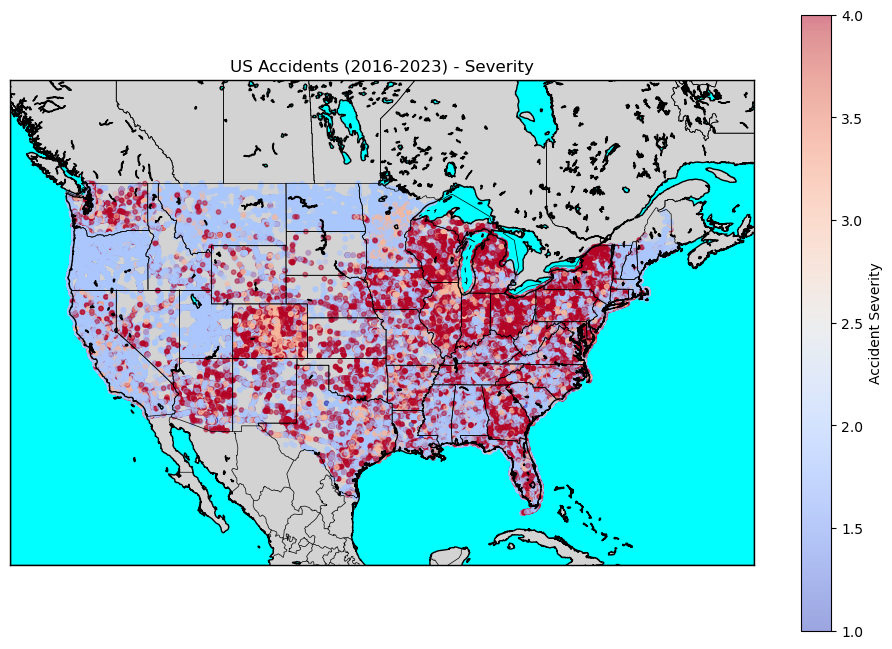

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# reload data ensure it has "Start_lat" and "Start_lng" for our geographical visualization
df = pd.read_csv("US_Accidents_March23.csv")

# Create the figure
plt.figure(figsize=(12, 8))

# Set up the Basemap centered on the US
m = Basemap(projection='merc', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=55, resolution='i')

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color="aqua")
m.fillcontinents(color="lightgray", lake_color="aqua")

# Convert lat/lon to map coordinates
x, y = m(df["Start_Lng"].values, df["Start_Lat"].values)

# Scatter plot all accident points
m.scatter(x, y, c=df["Severity"], cmap="coolwarm", alpha=0.5, marker="o", s=10)

plt.title("US Accidents (2016-2023) - Severity")
plt.colorbar(label="Accident Severity")
plt.show()

Accident Severity Heatmap Around the US based on Severity 1 - Severity 4

## Top 10 cities with the most severe accidents with geographical visualization

Text(0.5, 1.0, 'US Accidents (2016-2023) - Severity')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 1.0, 'Top 10 Cities with Most Severe Accidents (Severity 3 & 4)')

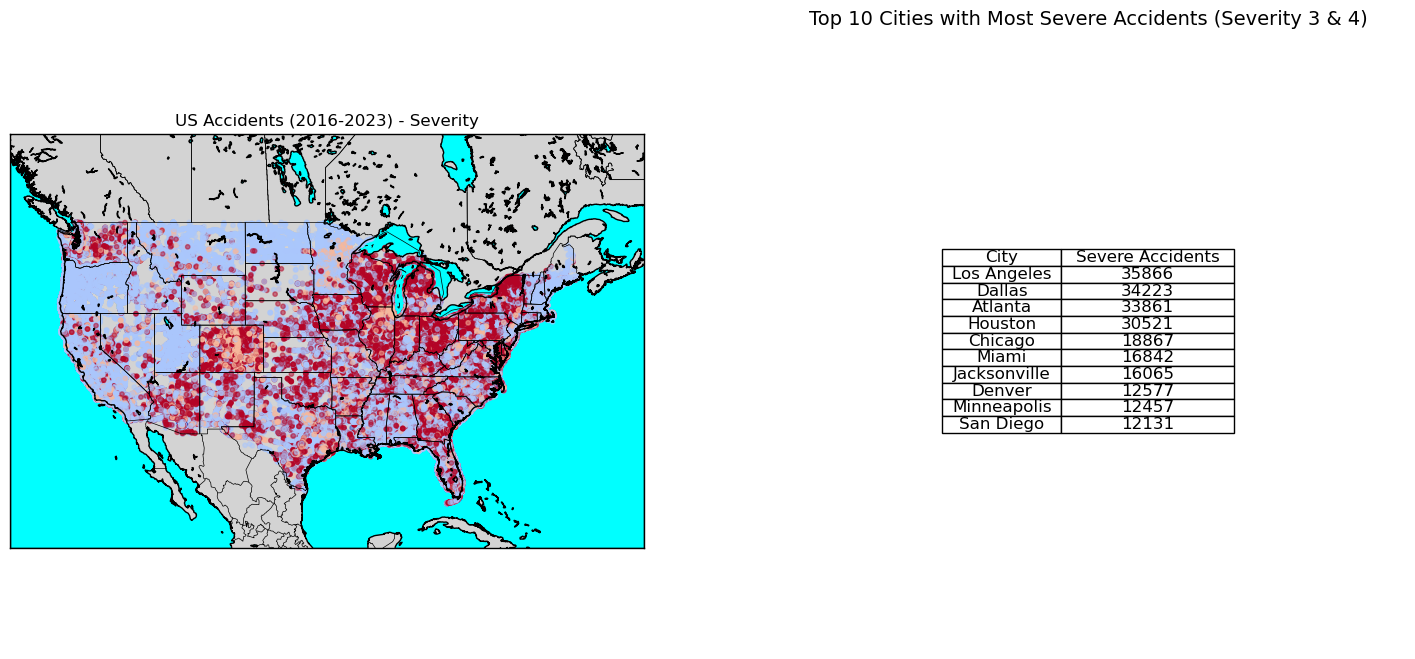

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load accident dataset (ensure it has 'Start_Lat', 'Start_Lng', 'City', and 'Severity' columns)
df = pd.read_csv("US_Accidents_March23.csv")

# Filter for severe accidents (Severity 3 and 4)
severe_accidents = df[df["Severity"] >= 3]

# Group by City and count the number of severe accidents (Severity 3 & 4)
top_severe_cities = severe_accidents["City"].value_counts().reset_index()
top_severe_cities.columns = ["City", "Severe Accidents"]
top_severe_cities = top_severe_cities.head(10)  # Get top 10 cities with the most severe accidents

# Create the figure with two subplots: (1) Map (2) Table
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# --------------------------- PLOT MAP ---------------------------
m = Basemap(projection='merc', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=55, resolution='i', ax=ax[0])

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color="aqua")
m.fillcontinents(color="lightgray", lake_color="aqua")

# Convert lat/lon to map coordinates
x, y = m(df["Start_Lng"].values, df["Start_Lat"].values)

# Scatter plot all accident points
m.scatter(x, y, c=df["Severity"], cmap="coolwarm", alpha=0.5, marker="o", s=10)

# Add title
ax[0].set_title("US Accidents (2016-2023) - Severity")

# --------------------------- PLOT TABLE ---------------------------
ax[1].axis("tight")
ax[1].axis("off")
ax[1].set_title("Top 10 Cities with Most Severe Accidents (Severity 3 & 4)", fontsize=14)

# Create table
table = ax[1].table(cellText=top_severe_cities.values,
                     colLabels=top_severe_cities.columns,
                     cellLoc="center",
                     loc="center")

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1])  # Adjust column widths

# Show the plot
plt.show()

Accident Severity Heatmap including cities that have the most number of severe accidents (Severe Accidents 3+)

## The geographical distirbution of the number of accidents in the U.S. 

python(25055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'US Accidents at Road Features (Bumps, Junctions, Traffic Signals, etc.)')

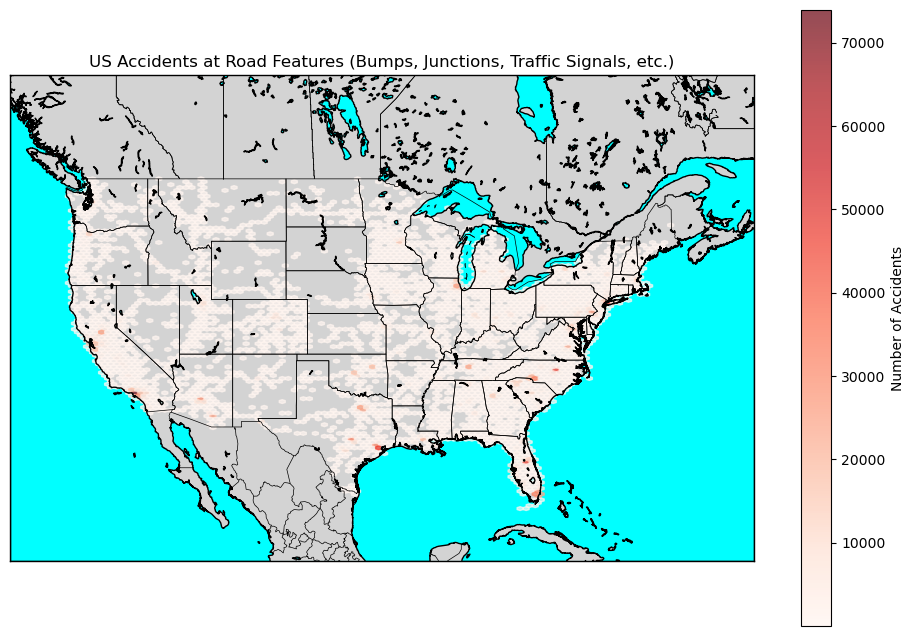


Top Cities with the Most Road Feature Accidents:

       City  Number of Accidents
    Houston                79022
      Miami                72058
  Charlotte                65967
    Orlando                47418
Los Angeles                46397
     Dallas                45414
    Raleigh                40087
     Austin                38224
     Tucson                27654
  Nashville                25554


In [76]:
!pip install ace_tools
import seaborn as sns

# Select relevant road features
road_features = ['Bump', 'Crossing', 'Junction', 'Railway', 'Roundabout', 'Stop', 'Traffic_Signal', 'Traffic_Calming']

# Filter dataset where at least one road feature is True
df_features = df[df[road_features].sum(axis=1) > 0]

# Count accidents by city where road features are involved
top_cities = df_features['City'].value_counts().head(10)  # Top 10 cities



# Create a figure for the Basemap
plt.figure(figsize=(12, 8))

# Initialize Basemap focused on the US
m = Basemap(projection='merc', llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-60, urcrnrlat=55, resolution='i')

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color="aqua")
m.fillcontinents(color="lightgray", lake_color="aqua")

# Convert latitude and longitude into map coordinates
x, y = m(df_features["Start_Lng"].values, df_features["Start_Lat"].values)

# Scatter plot accident locations (density-based)
m.hexbin(x, y, gridsize=100, cmap="Reds", alpha=0.7, mincnt=1)

# Add a color bar
plt.colorbar(label="Number of Accidents")

# Title
plt.title("US Accidents at Road Features (Bumps, Junctions, Traffic Signals, etc.)")

# Show the plot
plt.show()



# Create a DataFrame for top cities
top_cities_df = pd.DataFrame({'City': top_cities.index, 'Number of Accidents': top_cities.values})

# Print the DataFrame
print("\nTop Cities with the Most Road Feature Accidents:\n")
print(top_cities_df.to_string(index=False))

Most accidents within the US are based on road features such as Bump, Crossing, Junction, Railway, Roundabout, Stop, Traffic_Signal, and Traffic_Calming. Below the heatmap shows the top 10 cities that encounter these type of accidents

## Top 10 States With The Most Accidents

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='State'>

Text(0.5, 1.0, 'Top 10 States with Most Accidents')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Number of Accidents')

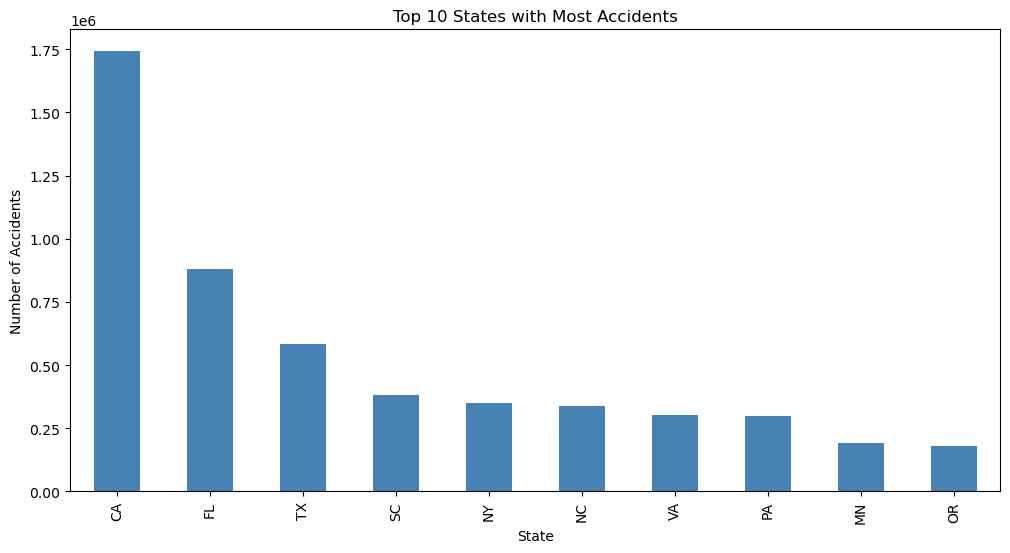

In [77]:
plt.figure(figsize=(12, 6))
df['State'].value_counts().nlargest(10).plot(kind='bar', color='steelblue')
plt.title("Top 10 States with Most Accidents")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()

## Features that cause road accidents and the number of accidents

<Figure size 1200x600 with 0 Axes>

<Axes: >

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Traffic_Signal'),
  Text(1, 0, 'Crossing'),
  Text(2, 0, 'Junction'),
  Text(3, 0, 'Stop'),
  Text(4, 0, 'Railway'),
  Text(5, 0, 'Traffic_Calming'),
  Text(6, 0, 'Bump'),
  Text(7, 0, 'Roundabout')])

Text(0.5, 0, 'Road Features')

Text(0, 0.5, 'Number of Accidents')

Text(0.5, 1.0, 'Impact of Road Features on Accidents')

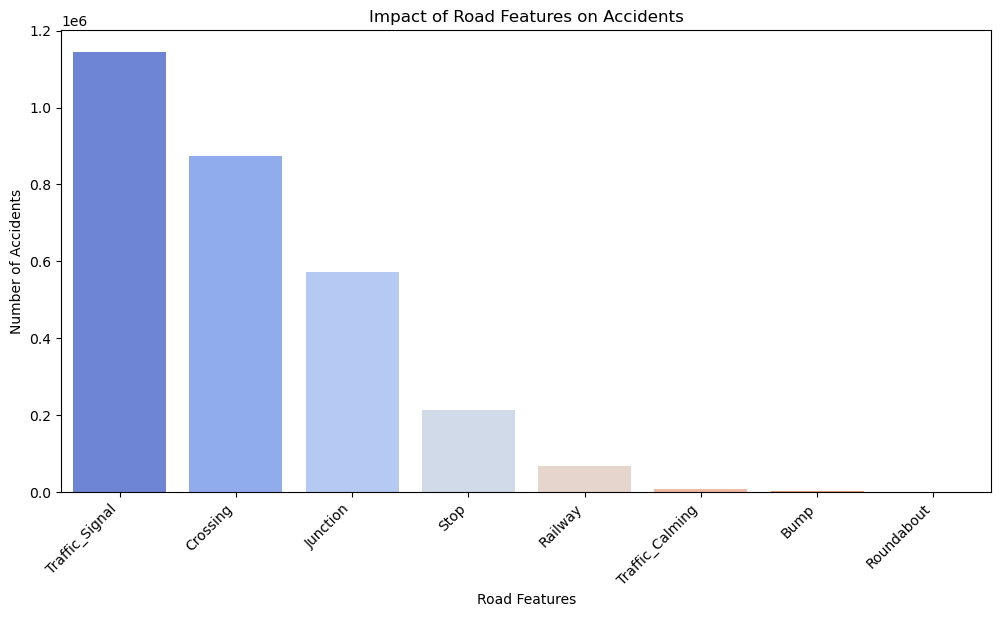

In [82]:
# Select road-related features
road_features = ['Bump', 'Crossing', 'Junction', 'Railway', 'Roundabout', 'Stop', 'Traffic_Signal', 'Traffic_Calming']

# Count number of accidents associated with each feature
accident_counts = df_cleaned[road_features].sum().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="coolwarm")

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("Road Features")
plt.ylabel("Number of Accidents")
plt.title("Impact of Road Features on Accidents")

plt.show()

## Number of Accident Based on Different Road Features

<Figure size 1400x800 with 0 Axes>

<Axes: >

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Traffic_Signal'),
  Text(1, 0, 'Crossing'),
  Text(2, 0, 'Junction'),
  Text(3, 0, 'Station'),
  Text(4, 0, 'Railway'),
  Text(5, 0, 'Bump')])

Text(0.5, 0, 'Road Feature')

Text(0, 0.5, 'Number of Accidents')

Text(0.5, 1.0, 'Number of Accidents Based on Different Road Features')

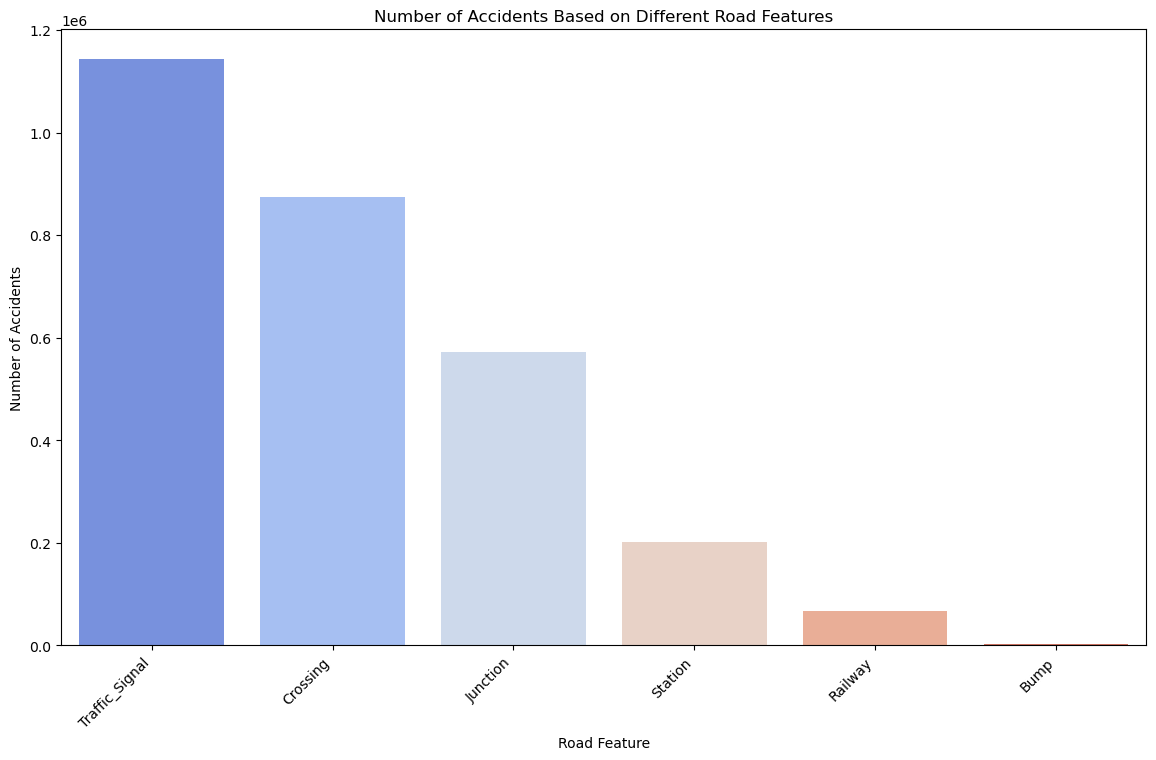

In [83]:

# Define road features to analyze
road_features = ['Junction', 'Traffic_Signal', 'Railway', 'Crossing', 'Bump', 'Station']

# Set figure size
plt.figure(figsize=(14, 8))

# Count number of accidents for each road feature
accident_counts = df_cleaned[road_features].sum().sort_values(ascending=False)

# Create bar plot
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="coolwarm")

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("Road Feature")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents Based on Different Road Features")

plt.show()

## Distirbution of Accidents By Hours of Days

<Figure size 1200x600 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Start_Hour', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Accidents by Hour of Day')

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'Number of Accidents')

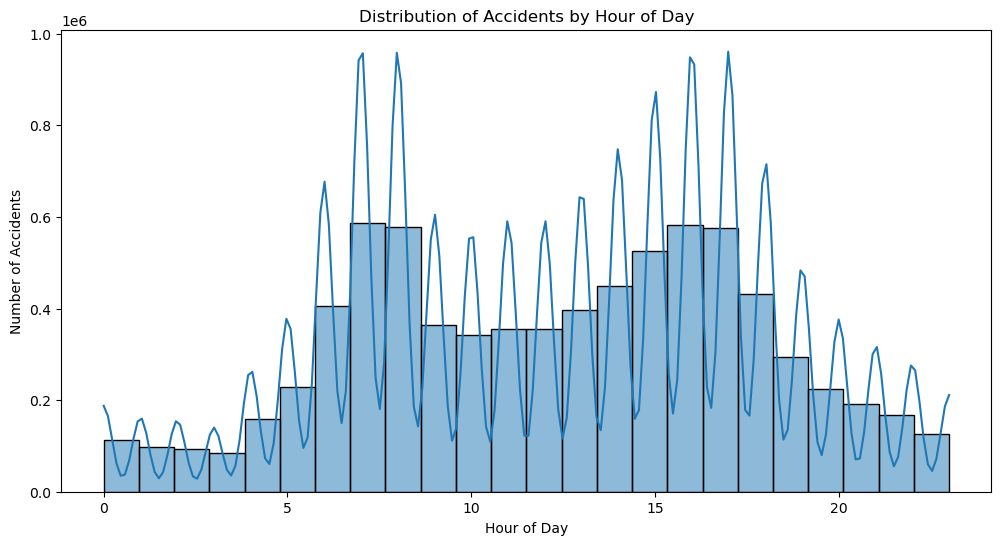

In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Start_Hour'], bins=24, kde=True)
plt.title("Distribution of Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

## Accidents by Time of Day

<Axes: xlabel='Time_of_Day'>

Text(0.5, 1.0, 'Accidents by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Number of Accidents')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning (5 AM - 12 PM)'),
  Text(1, 0, 'Afternoon (12 PM - 5 PM)'),
  Text(2, 0, 'Evening (5 PM - 9 PM)'),
  Text(3, 0, 'Night (9 PM - 5 AM)')])

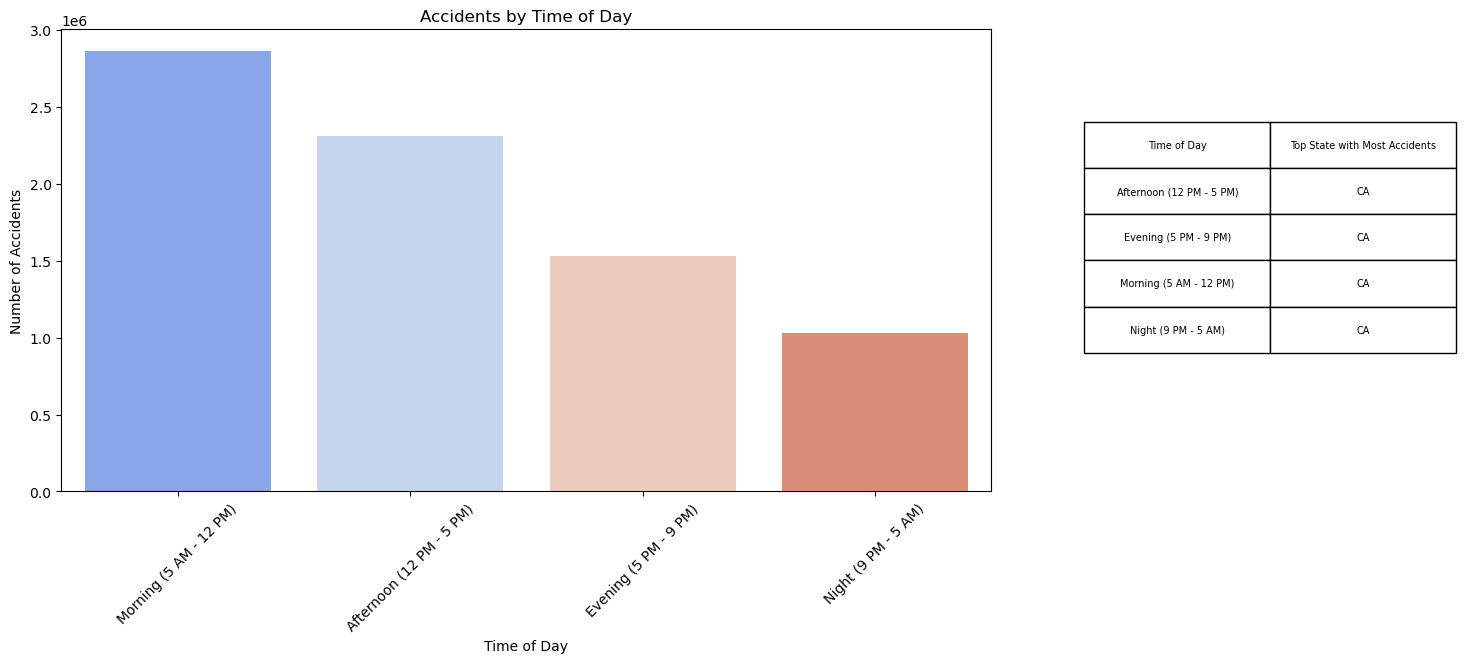

In [84]:

# Define time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning (5 AM - 12 PM)"
    elif 12 <= hour < 17:
        return "Afternoon (12 PM - 5 PM)"
    elif 17 <= hour < 21:
        return "Evening (5 PM - 9 PM)"
    else:
        return "Night (9 PM - 5 AM)"

# Apply function to categorize each accident's time
df_cleaned["Time_of_Day"] = df_cleaned["Start_Hour"].apply(categorize_time)

# Count accidents per time category
time_accident_counts = df_cleaned["Time_of_Day"].value_counts()

# Find the top accident locations for each time of day
top_locations_per_time = (
    df_cleaned.groupby("Time_of_Day")["State"]
    .apply(lambda x: x.value_counts().idxmax())  # Find the state with most accidents per time
    .reset_index()
)
top_locations_per_time.columns = ["Time of Day", "Top State with Most Accidents"]

# Create figure and bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=time_accident_counts.index, y=time_accident_counts.values, palette="coolwarm", ax=ax)
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)

# Create a table on the side with top accident locations
table_data = top_locations_per_time.values
table = plt.table(cellText=table_data, colLabels=top_locations_per_time.columns,
                  cellLoc='center', bbox=[1.1, 0.3, 0.4, 0.5])  # Adjust position

plt.show()


## Histogram of Accidents Based on Weather Conditions

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='Weather_Condition'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Scattered Clouds'),
  Text(1, 0, 'Light Snow'),
  Text(2, 0, 'Fog'),
  Text(3, 0, 'Rain'),
  Text(4, 0, 'Haze'),
  Text(5, 0, 'Fair / Windy'),
  Text(6, 0, 'Heavy Rain'),
  Text(7, 0, 'Light Drizzle'),
  Text(8, 0, 'Thunder in the Vicinity'),
  Text(9, 0, 'Cloudy / Windy'),
  Text(10, 0, 'T-Storm'),
  Text(11, 0, 'Mostly Cloudy / Windy'),
  Text(12, 0, 'Snow'),
  Text(13, 0, 'Thunder'),
  Text(14, 0, 'Light Rain with Thunder')])

Text(0.5, 0, 'Weather Condition')

Text(0, 0.5, 'Number of Accidents')

Text(0.5, 1.0, 'Histogram of Accidents Based on Weather Conditions')

(0.0, 209829.0)

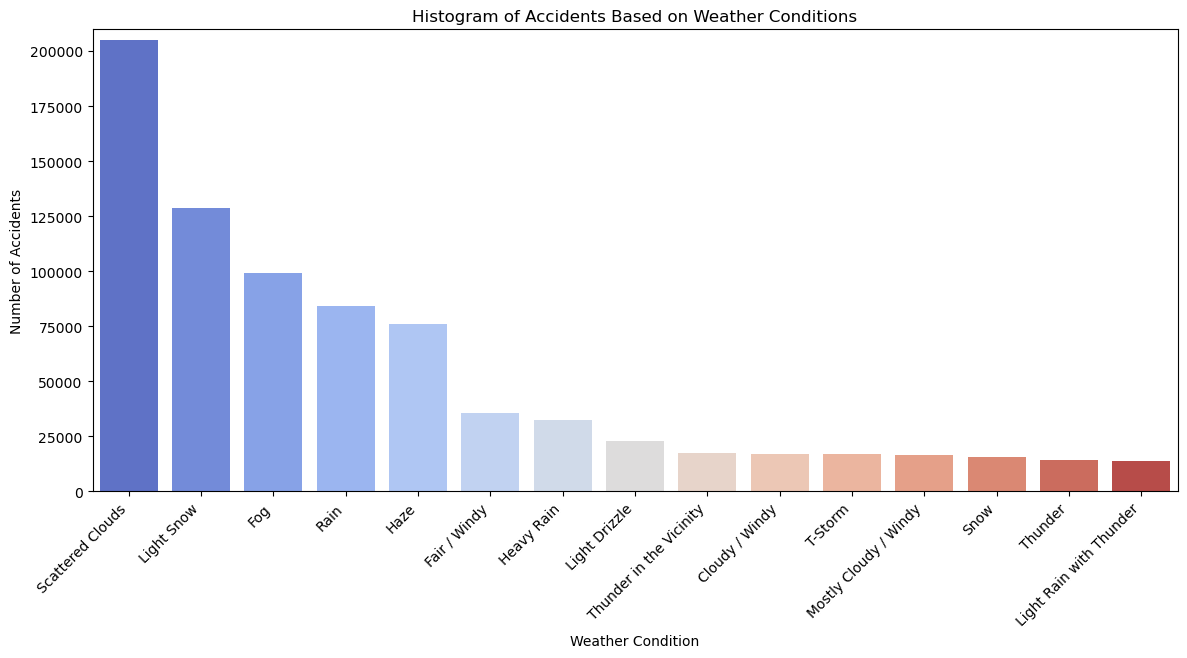

In [86]:

# Count number of accidents per weather condition
weather_accidents = df["Weather_Condition"].value_counts()

# Remove outliers (conditions with accident counts > 350,000)
weather_accidents = weather_accidents[weather_accidents <= 350000]

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=weather_accidents.index[:15], y=weather_accidents.values[:15], palette="coolwarm")  # Top 15 conditions

plt.xticks(rotation=45, ha="right")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Histogram of Accidents Based on Weather Conditions")

# Adjust y-axis limit dynamically based on the maximum value
plt.ylim(0, weather_accidents.max() + 5000)

plt.show()

## Number of Accidents Based on Wind Direction

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Wind_Direction'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CALM'),
  Text(1, 0, 'S'),
  Text(2, 0, 'SSW'),
  Text(3, 0, 'W'),
  Text(4, 0, 'WNW'),
  Text(5, 0, 'NW'),
  Text(6, 0, 'Calm'),
  Text(7, 0, 'SW'),
  Text(8, 0, 'WSW'),
  Text(9, 0, 'SSE'),
  Text(10, 0, 'NNW'),
  Text(11, 0, 'N'),
  Text(12, 0, 'SE'),
  Text(13, 0, 'E'),
  Text(14, 0, 'ESE'),
  Text(15, 0, 'NE'),
  Text(16, 0, 'ENE'),
  Text(17, 0, 'NNE'),
  Text(18, 0, 'VAR'),
  Text(19, 0, 'South'),
  Text(20, 0, 'Unknown'),
  Text(21, 0, 'West'),
  Text(22, 0, 'North'),
  Text(23, 0, 'Variable'),
  Text(24, 0, 'East')])

Text(0.5, 0, 'Wind Direction')

Text(0, 0.5, 'Number of Accidents')

Text(0.5, 1.0, 'Number of Accidents Based on Wind Direction')

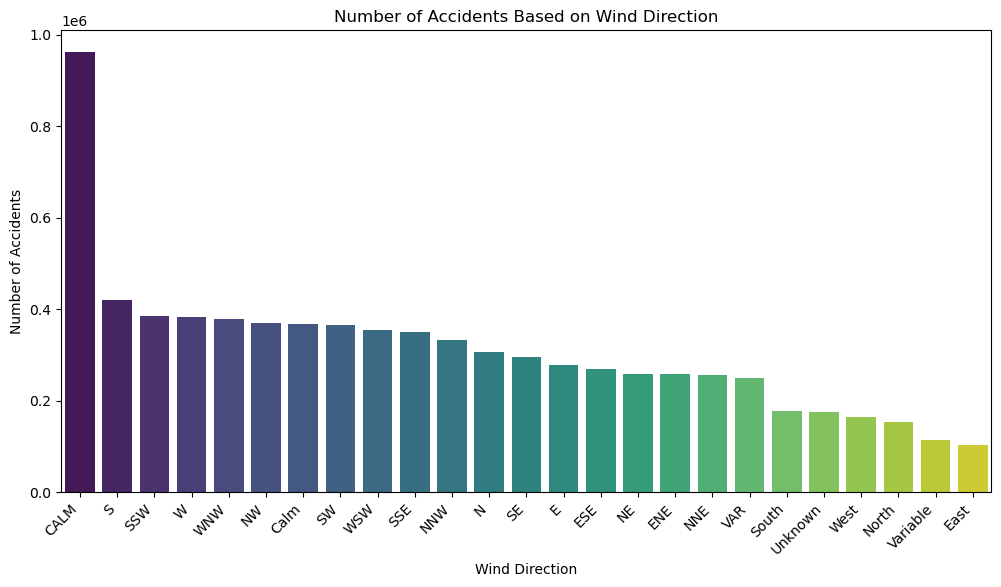

In [88]:
# Group by wind direction and count number of accidents
wind_direction_counts = df_cleaned['Wind_Direction'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=wind_direction_counts.index, y=wind_direction_counts.values, palette="viridis")

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Wind Direction")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents Based on Wind Direction")

# Show the plot
plt.show()

# Model Building

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


### XGBoost

In [39]:
from xgboost import XGBClassifier

param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],  # Number of boosting rounds
    'max_depth': [3, 6, 9, 12],  # Maximum depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of data used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2, 0.5],  # Minimum loss reduction required to make a split
    'reg_lambda': [1, 5, 10]  # L2 regularization term
}

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit to training data
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters from RandomizedSearchCV (XGBoost):", random_search_xgb.best_params_)

# Use the best model
best_xgb_model = random_search_xgb.best_estimator_

# predict
y_pred_xgb = best_xgb_model.predict(X_test_encoded)




/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'reg_lambda': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc')

Best Parameters from RandomizedSearchCV (XGBoost): {'subsample': 0.8, 'reg_lambda': 1, 'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}


### RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier



# Define the distribution of hyperparameters to sample from
param_dist_rf = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples in a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit to training data
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters from RandomizedSearchCV (RF):", random_search_rf.best_params_)

# Use the best model f
best_rf_model = random_search_rf.best_estimator_

# predict
y_pred_rf = best_rf_model.predict(X_test_encoded)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, scoring='roc_auc')

Best Parameters from RandomizedSearchCV (RF): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],  # Solvers for optimization
    'max_iter': [500, 1000, 1500, 2000]  # Number of iterations for convergence
}

# Initialize the model
model = LogisticRegression()

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)

# Use the best estimator
best_model_lr = random_search.best_estimator_

# predict
y_pred_lr = best_model_lr.predict(X_test_encoded)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'max_iter': [500, 1000, 1500, 2000],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='roc_auc')

Best Parameters from RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1500, 'C': 100.0}


### Neural Network

In [59]:
!pip install keras-tuner
!pip install --upgrade tensorflow
!pip install --upgrade keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameter tuning model
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(name='auc')] 
    )

    return model

# Initialize tuner with more trials
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),  
    max_trials=20, 
    executions_per_trial=2,
    directory='tuner_results',
    project_name='loan_nn_tuning'
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_auc', patience=3, restore_best_weights=True)

# Run hyperparameter tuning with EarlyStopping
tuner.search(X_train_resampled, y_train_resampled,
             epochs=20, batch_size=32,
             validation_data=(X_test_encoded, y_test),
             callbacks=[early_stopping],  # Adding early stopping here
             verbose=1)

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train the best model using EarlyStopping
best_model_nn = tuner.hypermodel.build(best_hps)

# Final training with EarlyStopping
history = best_model_nn.fit(X_train_resampled, y_train_resampled,
                         epochs=50, batch_size=32,
                         validation_data=(X_test_encoded, y_test),
                         callbacks=[early_stopping],  # Adding early stopping here as well
                         verbose=1)


Trial 15 Complete [00h 00m 28s]
val_auc: 0.6346132159233093

Best val_auc So Far: 0.6379163265228271
Total elapsed time: 00h 46m 23s
Best Hyperparameters: {'units': 352}
Epoch 1/50
7700/7700 ━━━━━━━━━━━━━━━━━━━━ 5s 566us/step - auc: 0.7052 - loss: 0.6267 - val_auc: 0.6402 - val_loss: 0.5134
Epoch 2/50
7700/7700 ━━━━━━━━━━━━━━━━━━━━ 4s 570us/step - auc: 0.7367 - loss: 0.6027 - val_auc: 0.6282 - val_loss: 0.5103
Epoch 3/50
7700/7700 ━━━━━━━━━━━━━━━━━━━━ 4s 551us/step - auc: 0.7541 - loss: 0.5877 - val_auc: 0.6196 - val_loss: 0.5099
Epoch 4/50
7700/7700 ━━━━━━━━━━━━━━━━━━━━ 4s 547us/step - auc: 0.7745 - loss: 0.5678 - val_auc: 0.6176 - val_loss: 0.5286


# Evaluation

We are ready to move onto the evaluation stage. Since this is a classification problem looking at car crash severities, our main metrics will be the ROC-AUC score and recall.

### XGBoost

In [60]:
# Evaluate the model
print("XGBoost AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost AUC Score: 0.5586848157656006
Confusion Matrix:
 [[32077  5562]
 [ 1735   626]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     37639
           1       0.10      0.27      0.15      2361

    accuracy                           0.82     40000
   macro avg       0.52      0.56      0.52     40000
weighted avg       0.90      0.82      0.85     40000



In [61]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X_test_encoded_df.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)
importance_df = importance_df[importance_df.Importance>0.01]

                                  Feature  Importance
9                                State_GA    0.035503
34                               State_OK    0.029922
35                               State_OR    0.026371
25                               State_NC    0.022357
89                 Weather_Condition_Fair    0.022171
..                                    ...         ...
165  Weather_Condition_Wintry Mix / Windy    0.000000
120         Weather_Condition_Light Sleet    0.000000
118  Weather_Condition_Light Rain Showers    0.000000
117   Weather_Condition_Light Rain Shower    0.000000
94         Weather_Condition_Funnel Cloud    0.000000

[189 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importances (XGBoost)')

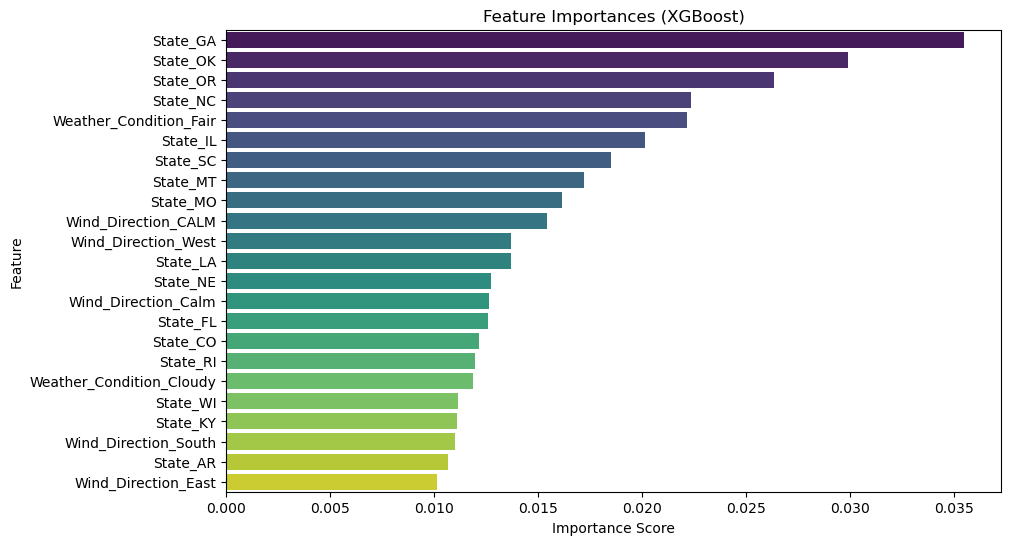

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances (XGBoost)")
plt.show()

It appears that all of our important features are categorical in nature. The most important features include various states, weather conditions, and wind directions. It is interesting that Weather_Condition_Fair and Wind_Direction_Calm are one of our most important features to predict car crash severities. This could be because most of the crashes in our dataset took place under fair weather conditions. Another thing to note is that even our most important feature has a feature importance of 0.035. This could be because our dataset has high granularity, so each feature contributed a small amount to the final prediction.

### Random Forest

In [63]:
# Evaluate the model
print("Random Forest AUC:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

Random Forest AUC: 0.5614907921876117
Confusion Matrix (RF):
 [[31252  6387]
 [ 1670   691]]
Classification Report (RF):
               precision    recall  f1-score   support

           0       0.95      0.83      0.89     37639
           1       0.10      0.29      0.15      2361

    accuracy                           0.80     40000
   macro avg       0.52      0.56      0.52     40000
weighted avg       0.90      0.80      0.84     40000



In [64]:
feature_importances = best_rf_model.feature_importances_


importance_df = pd.DataFrame({
    "Feature": X_test_encoded_df.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)
importance_df = importance_df[importance_df.Importance>0.01]


                                      Feature    Importance
89                     Weather_Condition_Fair  3.966507e-02
54                        Wind_Direction_CALM  3.483371e-02
9                                    State_GA  2.809415e-02
55                        Wind_Direction_Calm  2.681011e-02
83                    Weather_Condition_Clear  2.240510e-02
..                                        ...           ...
140  Weather_Condition_Sand / Dust Whirlwinds  1.797486e-06
143     Weather_Condition_Shallow Fog / Windy  1.659527e-06
152                 Weather_Condition_Squalls  1.556476e-06
87          Weather_Condition_Drizzle / Windy  4.516432e-07
93            Weather_Condition_Freezing Rain  3.318004e-07

[189 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importances (RandomForest)')

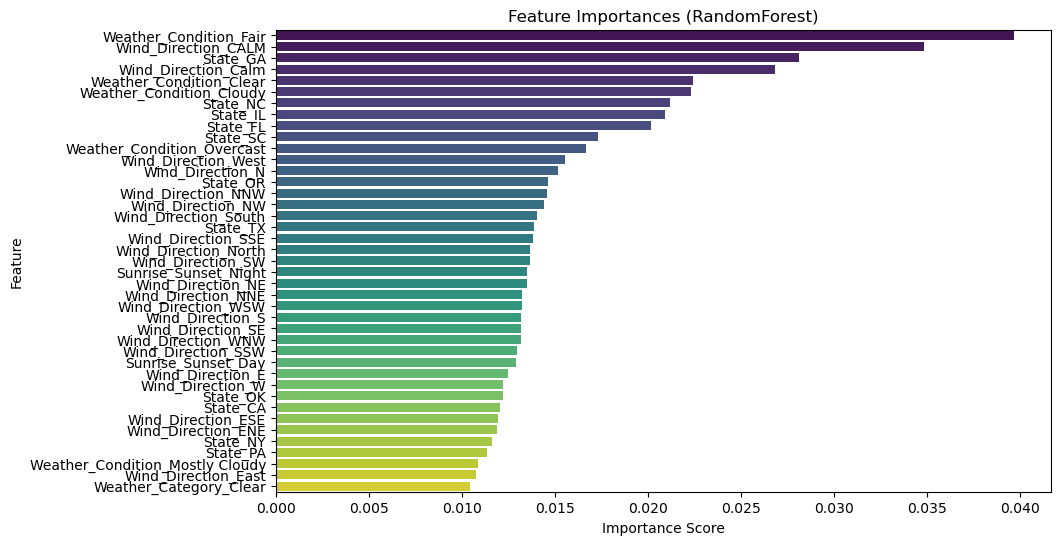

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances (RandomForest)")
plt.show()

It appears that all of our important features are still categorical in nature. The most important features are more focused on weather conditions and wind directions, whereas XGBoost put more emphasis on States. Fair and Calm conditions are actually the most important features. The feature importance scores are in the same range as XGBoost, with the most importance feature score approaching 0.040. There are far more features with an importance score > 0.01 as compared to XGBoost which makes sense as it is in the nature of boosting algorithms to consider less features.

### Logistic Regression

In [66]:
y_pred_lr = (y_pred_lr >= 0.5).astype(int)
print("AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


AUC Score: 0.5787786418646506
Confusion Matrix:
 [[29365  8274]
 [ 1470   891]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86     37639
           1       0.10      0.38      0.15      2361

    accuracy                           0.76     40000
   macro avg       0.52      0.58      0.51     40000
weighted avg       0.90      0.76      0.82     40000



### Neural Network

In [67]:
# Evaluate model
test_loss, test_auc_nn = best_model_nn.evaluate(X_test_encoded, y_test)
print(f"Test AUC: {test_auc_nn:.4f}")

# Predictions
y_pred_prob = best_model_nn.predict(X_test_encoded)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred_nn))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - auc: 0.6496 - loss: 0.5132
Test AUC: 0.6402
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     37639
           1       0.10      0.39      0.16      2361

    accuracy                           0.76     40000
   macro avg       0.53      0.59      0.51     40000
weighted avg       0.90      0.76      0.82     40000



### Model Summary

In [68]:
from sklearn.metrics import recall_score

models = {
    "Logistic Regression": best_model_lr,
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "Neural Network": best_model_nn,
}

results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test_encoded)

    if model_name == "Neural Network":  # Handle NN separately
        y_prob = y_pred.flatten()
        y_pred = (y_pred > 0.5).astype(int)
    else:
        y_prob = model.predict_proba(X_test_encoded)[:, 1]

    recall = recall_score(y_test, y_pred, average="macro")  # Unweighted recall
    auc = roc_auc_score(y_test, y_prob)  # AUC score

    results.append({"Model": model_name, "Recall": recall, "AUC": auc})

summary_df = pd.DataFrame(results)

summary_df.sort_values(by=['AUC','Recall'], ascending =False, inplace= True)
summary_df

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


,Model,Recall,AUC
3,Neural Network,0.585894,0.640136
0,Logistic Regression,0.578779,0.608599
2,XGBoost,0.558685,0.596091
1,Random Forest,0.561491,0.584046


From the summary table, it appears our Neural Network is performing the best, both in terms of recall and AUC scores. The Logistc Regression model is performing just slightly worse. With more research on neural networks and implementing more tuning techniques, this performance can be improved.